In [9]:
import copernicusmarine
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
?copernicusmarine.get

Signature:
copernicusmarine.get(
    dataset_id: Optional[str] = None,
    dataset_version: Optional[str] = None,
    dataset_part: Optional[str] = None,
    username: Optional[str] = None,
    password: Optional[str] = None,
    no_directories: bool = False,
    output_directory: Union[pathlib.Path, str, NoneType] = None,
    credentials_file: Union[pathlib.Path, str, NoneType] = None,
    overwrite: bool = False,
    request_file: Union[pathlib.Path, str, NoneType] = None,
    filter: Optional[str] = None,
    regex: Optional[str] = None,
    file_list: Union[pathlib.Path, str, NoneType] = None,
    create_file_list: Optional[str] = None,
    index_parts: bool = False,
    sync: bool = False,
    sync_delete: bool = False,
    skip_existing: bool = False,
    dry_run: bool = False,
    max_concurrent_requests: int = 15,
    disable_progress_bar: bool = False,
    staging: bool = False,
) -> copernicusmarine.core_functions.models.ResponseGet
Docstring:
Download originally produced dat

Get products

In [4]:
copernicusmarine.get(
    dataset_id="cmems_mod_glo_phy_my_0.083deg_P1D-m",
    filter="*2023/08/*"
)

INFO - 2025-10-30T08:21:03Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-10-30T08:21:13Z - Selected dataset version: "202311"
INFO - 2025-10-30T08:21:13Z - Selected dataset part: "default"
INFO - 2025-10-30T08:21:14Z - Listing files on remote server...
12it [00:03,  3.82it/s]


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-14/native/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1D-m_202311/2023/08/mercatorglorys12v1_gl12_mean_20230801_R20230802.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-14/native/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1D-m_202311/2023/08/mercatorglorys12v1_gl12_mean_20230801_R20230802.nc', file_size=1283.616415977478, last_modified_datetime='2025-10-16T10:06:59.650000+00:00', etag='"492c3e7910a462d12c009edb6aaf0c06-161"', file_format='.nc', output_directory=PosixPath('.'), filename='mercatorglorys12v1_gl12_mean_20230801_R20230802.nc', file_path=PosixPath('GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1D-m_202311/2023/08/mercatorglorys12v1_gl12_mean_20230801_R20230802.nc'), file_status='DOWNLOADED'), FileGet(s3_url='s3://mdl-native-14/native/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1D-m_202311/2023/08/mercatorglorys12v1_gl12_mean_20230802_R20230809.nc', h

Visualize

In [6]:
ds = xr.open_dataset("/home/ubuntu/mucilage_pipeline/mucilage-detection/src/notebooks/GLOBAL_MULTIYEAR_PHY_001_030/cmems_mod_glo_phy_my_0.083deg_P1D-m_202311/2023/08/mercatorglorys12v1_gl12_mean_20230801_R20230802.nc")
print(ds)

<xarray.Dataset> Size: 15GB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 1)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 8B 2023-08-01T12:00:00
Data variables:
    bottomT    (time, latitude, longitude) float64 71MB ...
    mlotst     (time, latitude, longitude) float64 71MB ...
    zos        (time, latitude, longitude) float64 71MB ...
    sithick    (time, latitude, longitude) float64 71MB ...
    siconc     (time, latitude, longitude) float64 71MB ...
    usi        (time, latitude, longitude) float64 71MB ...
    vsi        (time, latitude, longitude) float64 71MB ...
    so         (time, depth, latitude, longitude) float64 4GB ...
    thetao     (time, depth, latitude, longitude) float64 4GB ...
    uo         (time, depth,

In [7]:
sst = ds["thetao"].isel(depth=0, time=0)
print(sst)

<xarray.DataArray 'thetao' (latitude: 2041, longitude: 4320)> Size: 71MB
[8817120 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
    depth      float32 4B 0.494
    time       datetime64[ns] 8B 2023-08-01T12:00:00
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    valid_min:      -32760
    valid_max:      23210
    cell_methods:   area: mean


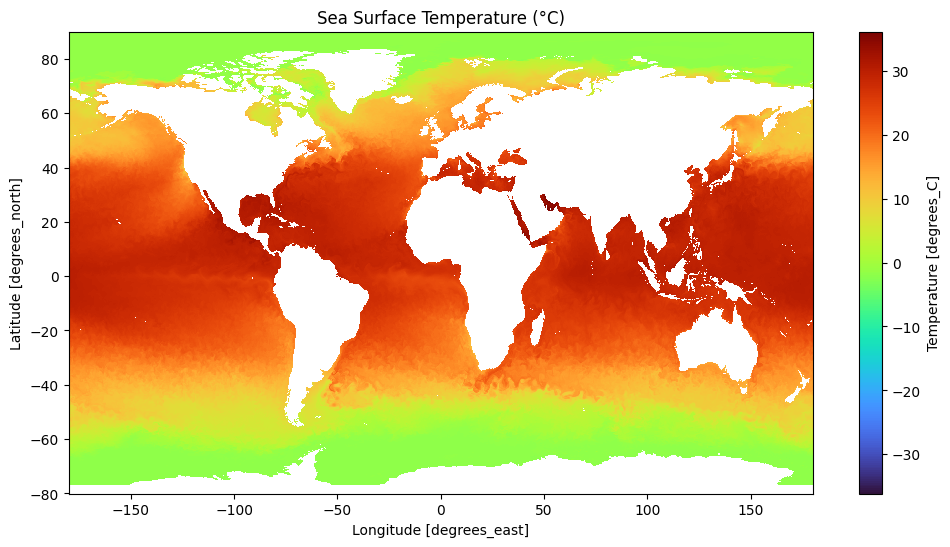

In [10]:
plt.figure(figsize=(12,6))
sst.plot(cmap="turbo")  # or "coolwarm"
plt.title("Sea Surface Temperature (°C)")
plt.show()

Text(0.5, 1.0, 'Adriatic SST (°C)')

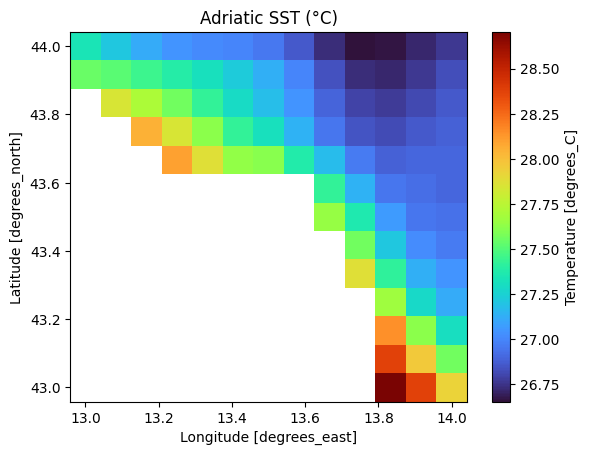

In [16]:
adr = sst.sel(latitude=slice(43, 44), longitude=slice(13, 14))
adr.plot(cmap="turbo")
plt.title("Adriatic SST (°C)")

Text(0.5, 1.0, 'Sea Surface Salinity (PSU)')

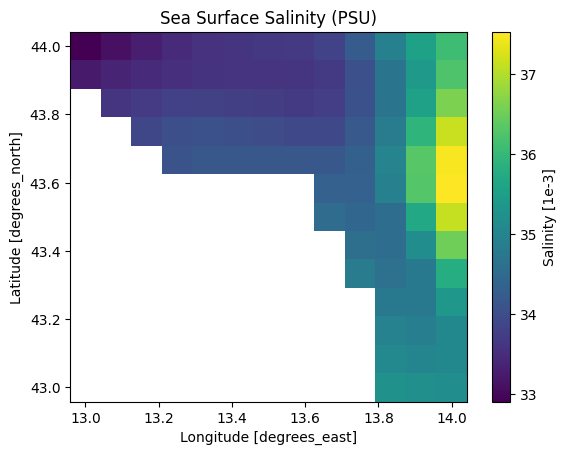

In [18]:
salinity = ds["so"].isel(depth=0, time=0)
adr_sal = salinity.sel(latitude=slice(43, 44), longitude=slice(13, 14))
adr_sal.plot(cmap="viridis")
plt.title("Sea Surface Salinity (PSU)")